Лабораторная работа 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

PATH = "pokemon.csv"

dataset = pd.read_csv(PATH)

In [2]:
TYPES = ["Grass", "Fire"]
COLUMNS_FOR_FACTORISATION = ["type1", "type2"]
NUMERIC_COLUMNS = ["total", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]
NONE_REPLACEMENT = {
    "type2": "None"
}

In [3]:
filtered_data = dataset.loc[dataset['type1'].isin(TYPES)]


filtered_data = filtered_data[
    ["name", "type1", "type2", "total", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]
]

In [4]:
for column, replacement in NONE_REPLACEMENT.items():
    filtered_data[column] = filtered_data[column].fillna(replacement)


factorization_table = {}
for column in COLUMNS_FOR_FACTORISATION:
    filtered_data[column], table = pd.factorize(filtered_data[column])
    factorization_table[column] = pd.DataFrame({column: table})


for column in NUMERIC_COLUMNS:
    filtered_data[column] = pd.to_numeric(filtered_data[column])


filtered_data.index = range(len(filtered_data))

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

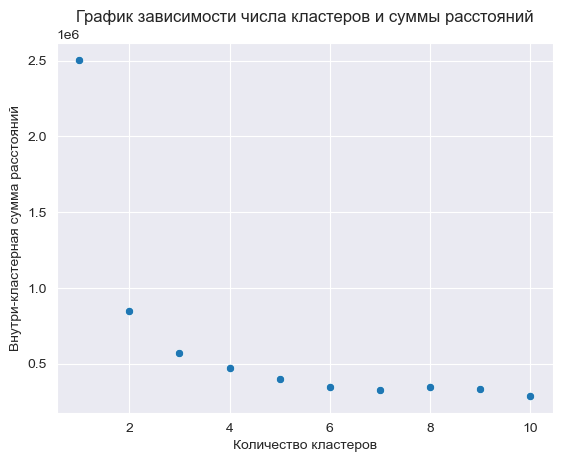

In [5]:

inertia = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(filtered_data.drop("name", axis=1))
    inertia.append(k_means.inertia_)


sns.set_style('darkgrid')
sns.scatterplot(x=[x for x in range(1, 11)], y=inertia)
plt.title('График зависимости числа кластеров и суммы расстояний')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')
plt.show()

In [6]:
CLUSTERS = 4

model = KMeans(n_clusters=CLUSTERS, random_state=42)
model.fit(filtered_data.drop("name", axis=1))

clusters = pd.DataFrame(
    columns=filtered_data.columns.drop("name"),
    data=model.cluster_centers_
)

clusters["Amount"] = np.unique(model.labels_, return_counts=True)[1]

print(clusters)

      type1     type2       total         hp      attack    defense  \
0  0.333333  3.222222  482.750000  77.638889   90.222222  78.416667   
1  0.312500  2.520833  297.937500  48.791667   51.750000  48.833333   
2  0.530612  4.387755  556.816327  85.510204  106.755102  87.714286   
3  0.500000  2.714286  406.285714  62.035714   71.178571  67.464286   

    sp_attack  sp_defense      speed  Amount  
0   88.666667   77.500000  70.305556      36  
1   52.187500   50.770833  45.604167      48  
2  104.224490   87.775510  84.836735      49  
3   75.035714   65.750000  64.821429      28  


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
print("Таблица факторизации для 'type1':")
print(factorization_table["type1"])

print("\nТаблица факторизации для 'type2':")
print(factorization_table["type2"])


Таблица факторизации для 'type1':
   type1
0  Grass
1   Fire

Таблица факторизации для 'type2':
       type2
0     Poison
1       None
2     Flying
3     Dragon
4    Psychic
5      Ghost
6       Rock
7   Fighting
8       Dark
9     Ground
10       Ice
11     Steel
12     Fairy
13    Normal
14     Water
15       Bug
